<a href="https://colab.research.google.com/github/pujaroy280/Data-Analytics-Microcredential/blob/main/(PR)Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

In this notebook, I classified a class of flower given the sepal length, sepal width, petal length, and petal width, from a dataset `iris`.

# Task 2: Load the Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3: Load the Data

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/pujaroy280/ML-Data/main/iris.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [55]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Checked for any missing values.

In [56]:
df.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

Used a heatmap just to see it. Pretty cool.

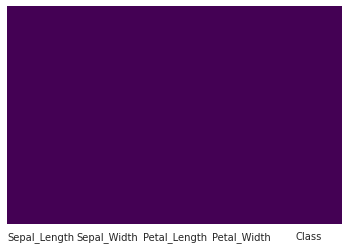

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Let's checked the features for the DataFrame `df`

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Given the state of our dataset, we need to change categorical features to dummy variables using Pandas. If we don't, then our ML model will not be able to take in those features as input. 

In [60]:
def class_value(Class):
    """
    Description: This function replaces categorical values with numerical values.
    Created by: Puja 
    Input: Class column of the DataFrame
    Output: A O, 1, or 2 for 'Setosa', 'Versicolor, and 'Virginica,' respectively.
    """
    if Class == 'Setosa':
        return 0
    elif Class == 'Versicolor':
        return 1
    else:
        return 2

# Created a function to convert a non-numerical value to a numerical value.

df['Class'] = df['Class'].apply(class_value)

In [61]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


As we can see, we changed the `Class` strings into `int` values. 
* Setosa is assigned 0
* Versicolor is assigned 1
* Virginica is assigned 2

Tried to use dummy variables but this method seemed easier.

# Task 5: Data Visualization

Now for some purdy graphs.

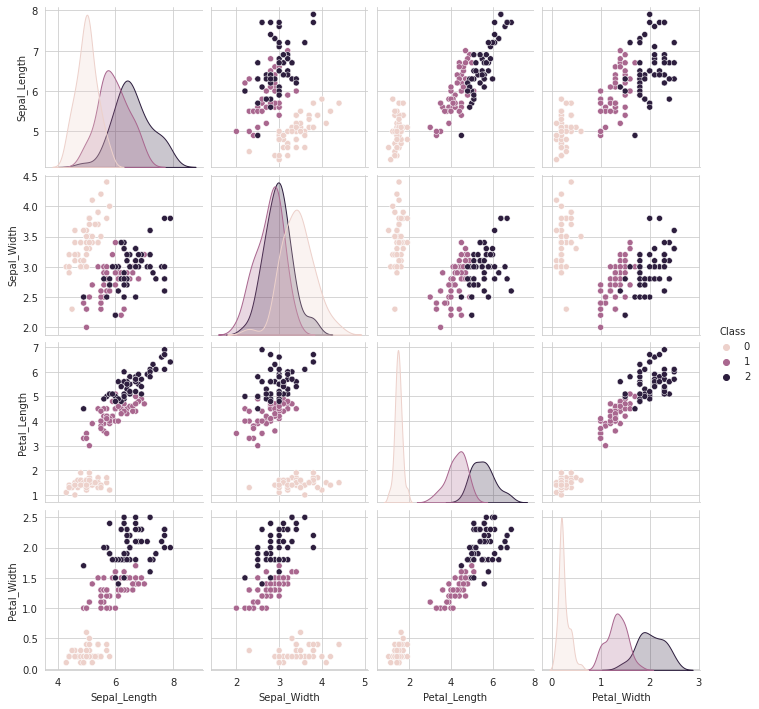

In [62]:
sns.pairplot(df, hue='Class')

Let's create a boxplot for `Class` to pedal length, pedal width, sepal length, and sepal width.

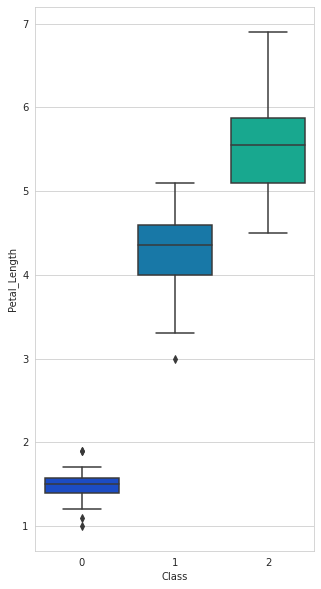

In [63]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Class', y='Petal_Length', data=df, palette='winter')

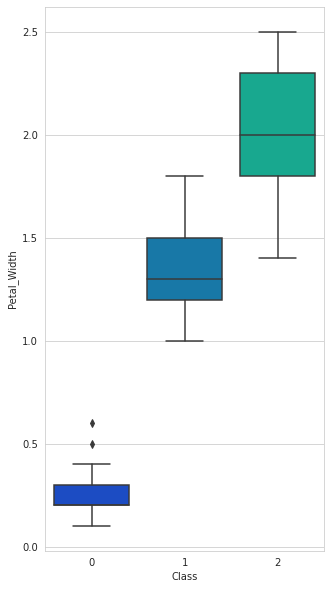

In [64]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Class', y='Petal_Width', data=df, palette='winter')

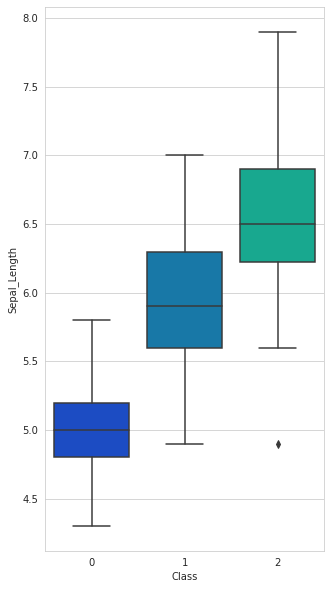

In [65]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Class', y='Sepal_Length', data=df, palette='winter')

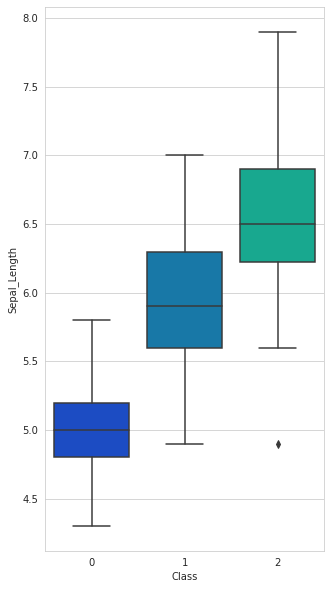

In [66]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Class', y='Sepal_Length', data=df, palette='winter')

Looking at each box plot, we see that the classes barely overlap in regards to each attribute. More precisely, each class seems to have distinctive intervals for pedal and sepal sizes.

***


Let's observe the count for each class of flower. Classes are:

* `Setosa` is assigned 0
* `Versicolor` is assigned 1
* `Virginica` is assigned 2

Not sure how to relabel the x-axis with corresponding class so I will leave them as ints.

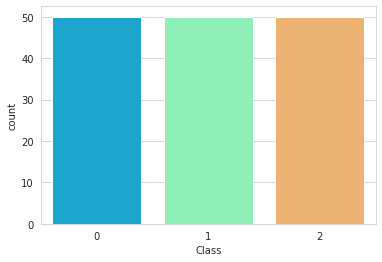

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Class', data=df, palette='rainbow')

It looks like we have 50 of each class of flower. Well, that's nice.

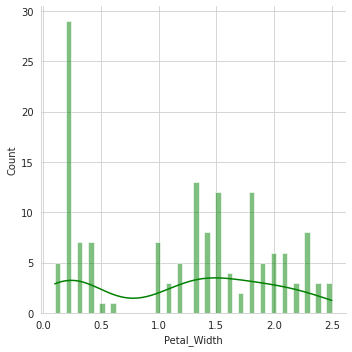

In [107]:
sns.displot(df['Petal_Width'], kde=True, color='green', bins=50)

We can see that of all the flowers in the dataset, petals with a width of 0.2 are more common than any other length. We can also see that from `df.head()` that class `Setosa` has many 0.2 petals. We can assume many of `Setosa` class flowers are 0.2. 

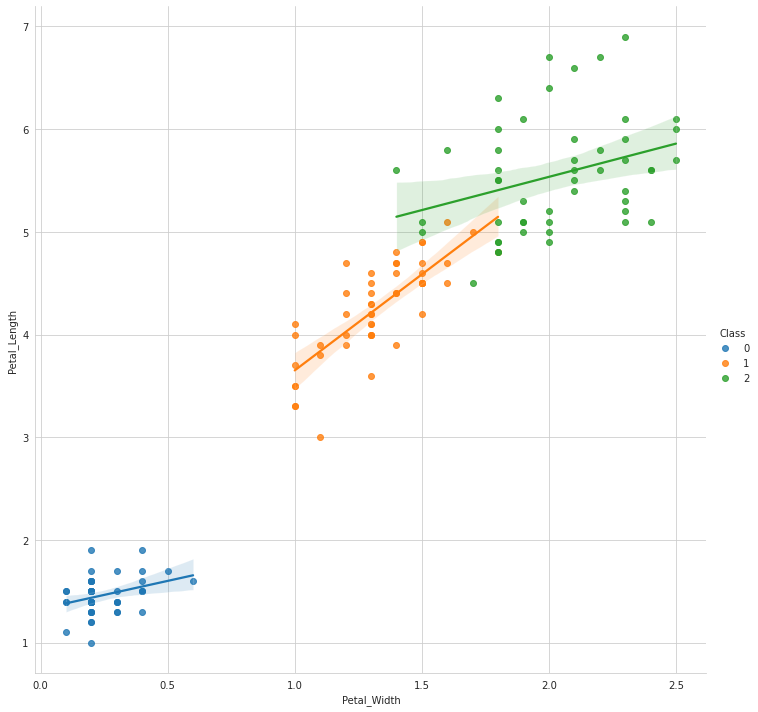

In [69]:
sns.lmplot(x='Petal_Width', y ='Petal_Length', data = df, hue = 'Class', height = 10)

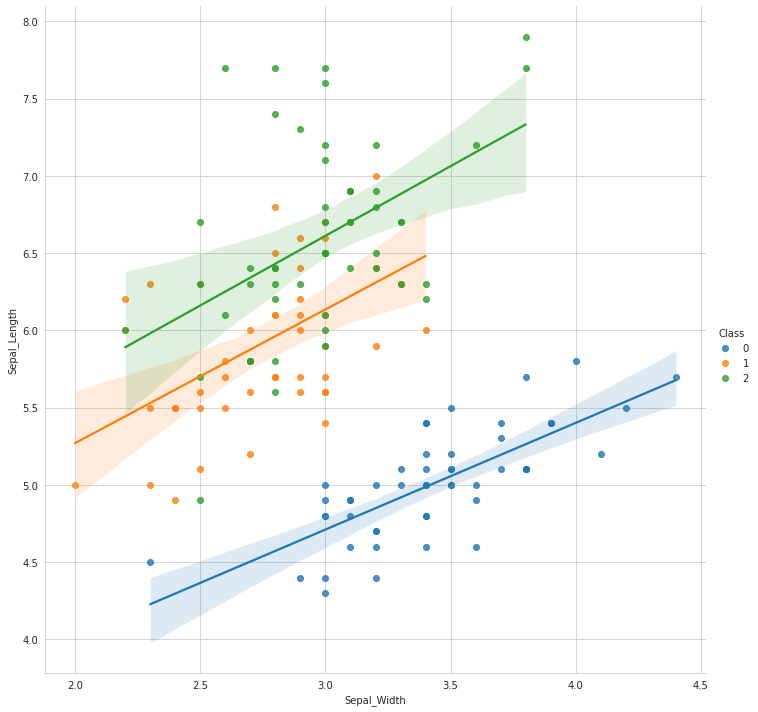

In [70]:
sns.lmplot(x='Sepal_Width', y ='Sepal_Length', data = df, hue = 'Class', height = 10)

Plot data and regression model fits across a FacetGrid.

`FacetGrid` class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

We can see each class plotted **as well** as a linear regression model. 

https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/

# Task 6: Compute the Cost Function

## N/A

# Task 7: Compute the Gradient Descent

## N/A

# Task 8: Train,Test, Split. Repeat.

In [71]:
from sklearn.model_selection import train_test_split

Now for the `train_test_split`. We want to make sure the data split is random because the dataset is organized. We can see each class of flowers is organized as such:
*  First 50 rows are `Setosa` (0)
*  Second 50 rows are `Versicolor` (1)
*  Last 50 rows are `Virginica` (2)

In order to have a good test split, we want random values. You can run the test splits above and see each `X_train` is different."


## First Data Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.10)

In [73]:
X_train

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
79,5.7,2.6,3.5,1.0
2,4.7,3.2,1.3,0.2
74,6.4,2.9,4.3,1.3
12,4.8,3.0,1.4,0.1
1,4.9,3.0,1.4,0.2
...,...,...,...,...
142,5.8,2.7,5.1,1.9
41,4.5,2.3,1.3,0.3
139,6.9,3.1,5.4,2.1
56,6.3,3.3,4.7,1.6


## First Classification Report

Import the neccessary libraries.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logmodel = LogisticRegression()

In [75]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.93      0.93      0.93        15
weighted avg       0.95      0.93      0.93        15



The first classification report corresponds to the first data split, with
 `test_size=0.10`.

With just a test size of 10% (probably correct) of the data, we are pretty accurate. Recalling the boxplots we did earlier, it seems that the each class has very distince sizes. Let's try another test split.

***

Now, the second data split. I'll reuse `X_train, X_test, y_train, y_test` because I keep getting warnings if I use more variables. Maybe an issue with memory?

## Second Data Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.20)

In [79]:
# Notice how it differs from X_train(1).
X_train

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
29,4.7,3.2,1.6,0.2
115,6.4,3.2,5.3,2.3
3,4.6,3.1,1.5,0.2
60,5.0,2.0,3.5,1.0
81,5.5,2.4,3.7,1.0
...,...,...,...,...
95,5.7,3.0,4.2,1.2
71,6.1,2.8,4.0,1.3
78,6.0,2.9,4.5,1.5
55,5.7,2.8,4.5,1.3


## Second Classification Report

In [80]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Using a larger test size gives a more accurate report. Now, let's try `test_size=0.3`.

## Third Split, with Classification Report

In [81]:
logmodel = LogisticRegression()
# not sure why but reusing logmodel repeatedly without reinitializing causes a warning. Will just recode it just in case.

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.30)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



With `test_size=0.3`, we are incredibly accurate. Noice.

# Task 9: KNN Model

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

`fit()` computes the mean and std (standard deviation) to be used for later scaling.

In [84]:
scaler.fit(df.drop(['Class'], axis = 1))

StandardScaler()

`transform()` performs standardization by centering and scaling. Recall that we have the mean and std from `fit()` method used earlier.

In [85]:
scaled_features = scaler.transform(df.drop(['Class'], axis=1))

In [86]:
# scaled_features

In [87]:
pd.DataFrame(scaled_features)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [88]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])


In [89]:
df_feat

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


Note that `df_feat` changes with ` pd.DataFrame(scaled_features, columns=df.columns[:-1]`. Looks like we label `df_feat` with column names from `df`. 

In [90]:
df_feat.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [91]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


`test_size=0.3` seems to result in the best accuracy

In [92]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, df['Class'], test_size=0.30)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
pred = knn.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

Looks like a 3x3 matrix because we have 3 values that correspond to 3 classes of flowers.

In [96]:
print(confusion_matrix(y_test,pred))

[[14  0  0]
 [ 0 18  1]
 [ 0  2 10]]


In [97]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.95      0.92        19
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [98]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

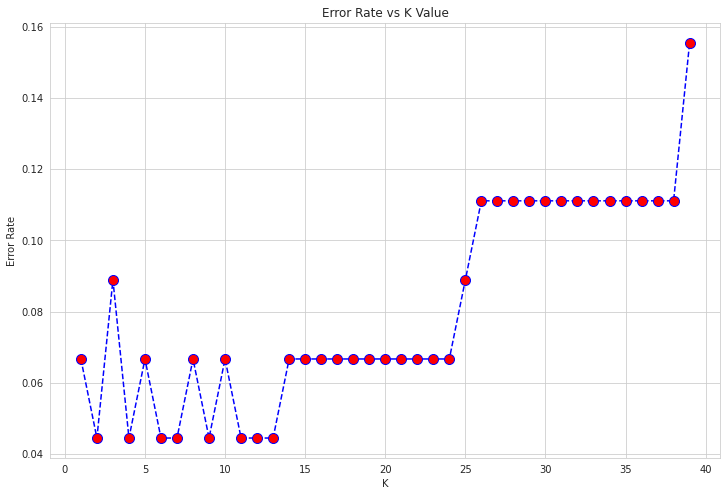

In [99]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Looking at the graph, we can see when K is within 22 and 29, we have a very low error rate. 

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 1')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 1
[[14  0  0]
 [ 0 18  1]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.95      0.92        19
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [101]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 27')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 27
[[14  0  0]
 [ 0 18  1]
 [ 0  4  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.95      0.88        19
           2       0.89      0.67      0.76        12

    accuracy                           0.89        45
   macro avg       0.90      0.87      0.88        45
weighted avg       0.89      0.89      0.89        45



In [102]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 35')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 35
[[14  0  0]
 [ 0 18  1]
 [ 0  4  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.95      0.88        19
           2       0.89      0.67      0.76        12

    accuracy                           0.89        45
   macro avg       0.90      0.87      0.88        45
weighted avg       0.89      0.89      0.89        45



It seems like when K is within 22 and 29, we have the lowest error rate. Noice.

# Task 10: Conclusions

Given data from the box plots and the logical regression, 

In [103]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


By examining the data set, we can predict that each class of flower contains distinctive range of widths and lengths for their sepals and petals. Reviewing the boxplots earlier, it is clear that each class has distinct median and quartile values for sepal width, sepal length, petal width, and petal length. The model results in high accuracy because each class has distinct distributions for their sizes, allowing the machine learning algorithms to easily predict the class of flower.